Smoothness functional (Chức năng làm mịn)

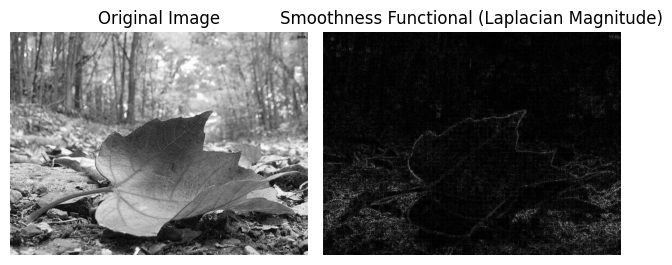

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Smoothness functional.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Calculate the magnitude of the Laplacian
laplacian_magnitude = np.abs(laplacian)

# Display the original image and the smoothness functional
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_magnitude, cmap='gray')
plt.axis('off')
plt.title('Smoothness Functional (Laplacian Magnitude)')

plt.tight_layout()
plt.show()

**Nhận xét:** Ta thấy các vùng có cường độ thấp (các vùng mịn) sẽ xuất hiện tối hơn, trong khi các vùng có cường độ cao (các cạnh hoặc vùng chi tiết) sẽ xuất hiện sáng hơn.

The Kernel trick (Kỹ thuật kernel)

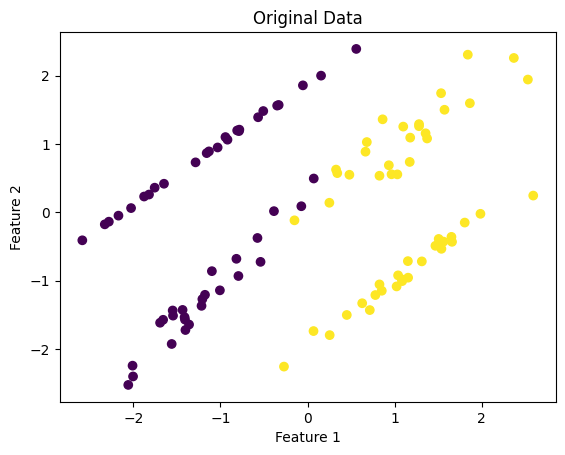

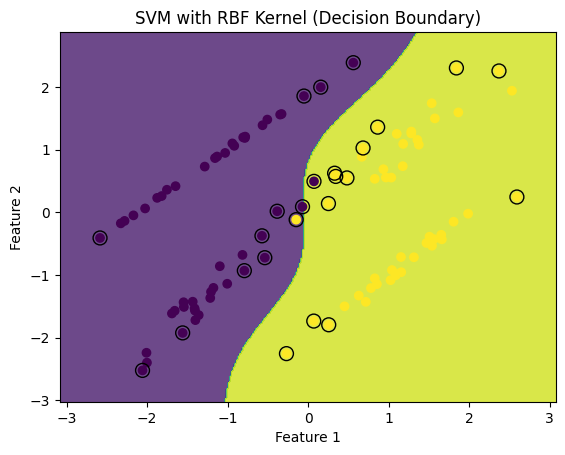

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.show()

# Apply the kernel trick with SVM
svm = SVC(kernel='rbf', gamma='scale')  # RBF kernel
svm.fit(X, y)

# Create a meshgrid to visualize the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel (Decision Boundary)")
plt.show()

**Nhận xét:** Ta có thể quan sát cách mà the kernel trick cho phép SVM tìm ranh giới quyết định phi tuyến tính trong không gian đối tượng, phân tách hiệu quả các lớp trong data ban đầu.

The representer theorem (Định lý Đại diện)

In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernel ridge regression model
alpha = 0.1  # Regularization parameter
kernel = 'rbf'  # Radial basis function kernel
gamma = 0.1  # Kernel parameter
model = KernelRidge(alpha=alpha, kernel=kernel, gamma=gamma)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the learned coefficients (representer values)
representer_values = model.dual_coef_

# Print the representer values
print("Representer Values:", representer_values)

Mean Squared Error: 0.021272597192036745
Representer Values: [[ 0.51143279]
 [ 0.06637038]
 [-1.79237226]
 [ 0.73779288]
 [-0.24928249]
 [ 0.18082161]
 [-0.03464719]
 [-0.0374339 ]
 [ 0.08735248]
 [ 1.61072456]
 [ 1.00721854]
 [-0.26032893]
 [ 0.12635658]
 [ 0.53003149]
 [-1.13529597]
 [-0.36328124]
 [ 0.33934818]
 [ 0.67157608]
 [ 0.07193803]
 [ 1.67889194]
 [-1.69053612]
 [-0.89084147]
 [ 0.76676952]
 [-0.10182957]
 [-0.05941417]
 [ 0.12851904]
 [-0.88540639]
 [-1.32299877]
 [-1.75933192]
 [ 0.71233049]
 [-1.14158154]
 [ 0.16993957]
 [ 0.85153522]
 [ 0.51474424]
 [ 0.19302381]
 [ 0.90334411]
 [ 1.07109594]
 [ 0.88104897]
 [ 1.40664895]
 [-1.27650945]
 [ 0.47852228]
 [-0.31590115]
 [-1.26288039]
 [ 1.54531993]
 [-0.34434437]
 [ 1.72006953]
 [ 0.88393931]
 [ 2.0549708 ]
 [ 1.40045766]
 [ 0.24320621]
 [-0.83245582]
 [-1.40538673]
 [-0.43167387]
 [-0.30073632]
 [ 3.43427481]
 [ 1.18028364]
 [-0.95503568]
 [-0.8053786 ]
 [-0.38484375]
 [ 0.15639177]
 [ 0.10107079]
 [-0.1240699 ]
 [-0.7357

 **Nhận xét**: Ta có thể quan sát việc thực hiện định lý đại diện bằng cách lấy các giá trị đại diện từ mô hình kernel ridge regression. Các giá trị này biểu thị sự kết hợp tuyến tính của training data.

Kernel ridge regression

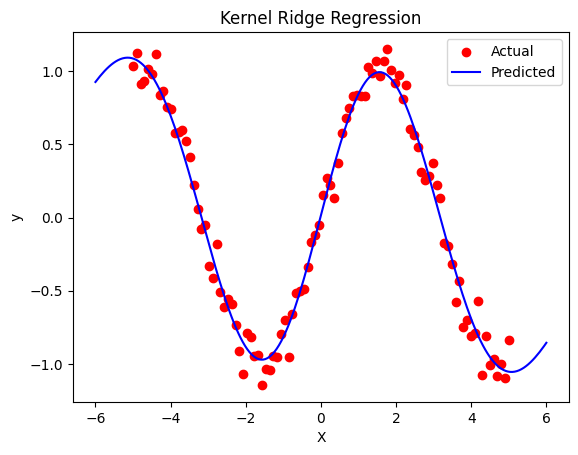

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Generate synthetic data
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Define the kernel ridge regression model
alpha = 0.1  # Regularization parameter
kernel = 'rbf'  # Radial basis function kernel
gamma = 0.1  # Kernel parameter
model = KernelRidge(alpha=alpha, kernel=kernel, gamma=gamma)

# Fit the model on the data
model.fit(X, y)

# Generate points for prediction
X_pred = np.linspace(-6, 6, 200).reshape(-1, 1)

# Make predictions
y_pred = model.predict(X_pred)

# Plot the results
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X_pred, y_pred, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Kernel Ridge Regression')
plt.legend()
plt.show()

**Nhận xét:** Ứng dụng của kernel ridge regression để fit mối quan hệ phi tuyến tính giữa X và y

Kernel logistic regression

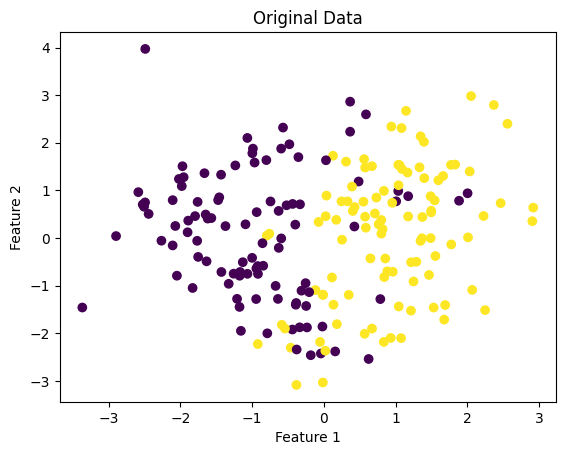

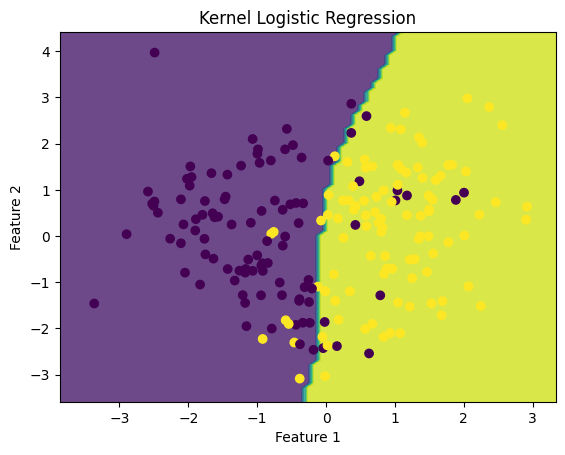

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.show()

# Define the kernel approximation model
gamma = 0.1  # Kernel parameter
n_components = 100  # Number of Monte Carlo samples
rbf_feature = RBFSampler(gamma=gamma, n_components=n_components, random_state=42)

# Apply kernel approximation to the data
X_features = rbf_feature.fit_transform(X)

# Define the kernel logistic regression model
C = 1.0  # Regularization parameter
model = LogisticRegression(C=C, solver='liblinear')

# Fit the model on the kernel-approximated features
model.fit(X_features, y)

# Generate points for prediction
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
X_pred = np.c_[xx1.ravel(), xx2.ravel()]
X_pred_features = rbf_feature.transform(X_pred)

# Make predictions
y_pred = model.predict(X_pred_features)
y_pred = y_pred.reshape(xx1.shape)

# Plot the results
plt.contourf(xx1, xx2, y_pred, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kernel Logistic Regression')
plt.show()

**Nhận xét:** Ứng dụng của kernel logistic regression để phân loại các mẫu phi tuyến tính trong dữ liệu bằng cách sử dụng các kỹ thuật hồi quy logistic và xấp xỉ nhân.

# Kernel PCA và PCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Generate Swiss roll-like dataset
X, _= make_swiss_roll(n_samples=1000, noise=0.5, random_state=42)

C:\Users\DHPC\AppData\Local\Temp\ipykernel_26508\3772037844.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')


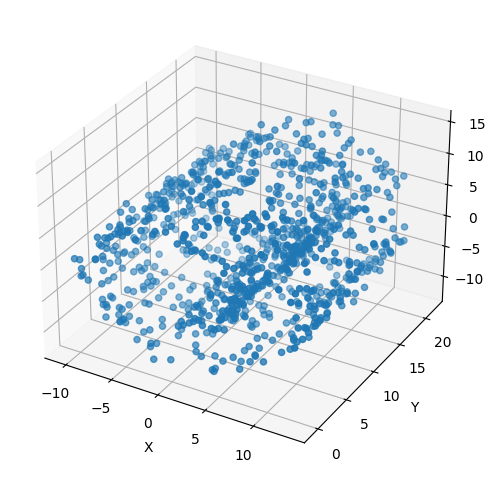

In [ ]:
def plot_3d(X, y):
    # Tạo một subplot 3D
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    # Vẽ biểu đồ scatter 3D
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    # Đặt nhãn cho các trục
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Hiển thị biểu đồ
    plt.show()
plot_3d(X, None)

PCA

C:\Users\DHPC\AppData\Local\Temp\ipykernel_26508\2761828998.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


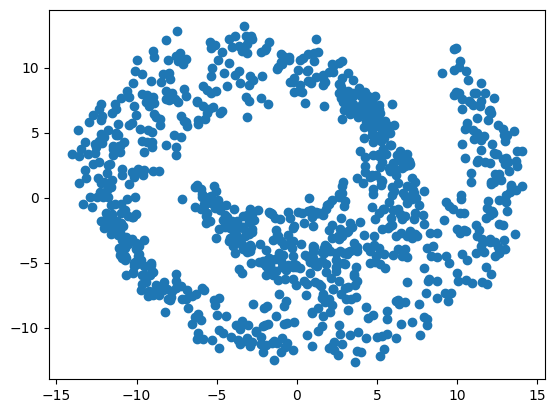

In [ ]:
scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.show()


Kernel PCA(KPCA)

C:\Users\DHPC\AppData\Local\Temp\ipykernel_26508\2562005390.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(k_pca[:, 0], k_pca[:, 1], cmap='viridis')


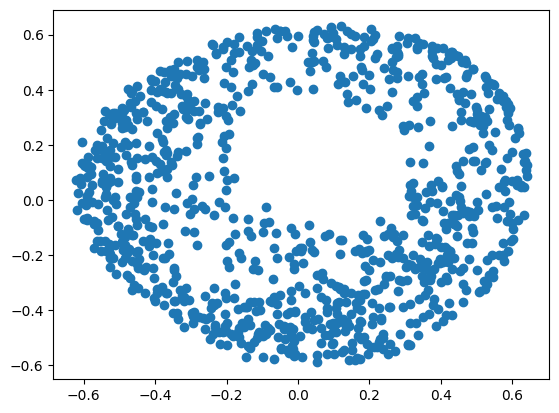

In [ ]:

def kernel_pca(X,gamma):
    kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=gamma, n_components=2,random_state=42)
    X_kpca = kpca.fit_transform(X)
    return X_kpca
k_pca=kernel_pca(X,0.007)
plt.scatter(k_pca[:, 0], k_pca[:, 1], cmap='viridis')
plt.show()

# Các phương Kmeans, Greedy , Spectral trong không gian kernel RKHS

In [ ]:
# pairwise_kernels được dùng để đưa dữ liệu qua kernel thông qua phân phối Gaussian

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import SpectralClustering

def kernel_Kmeans(X, k):
    kernel_matrix = pairwise_kernels(X, metric='rbf', gamma=0.1)
    kkmeans = KMeans(n_clusters=k, random_state=0)
    kkmeans.fit(kernel_matrix)
    labels = kkmeans.labels_
    return labels

def kernel_greedy(X, k, max_iter):
    X = pairwise_kernels(X, metric='rbf', gamma=0.1)
    n_points, n_features = X.shape

    # Khởi tạo khoảng cách và label ban đầu
    distances = np.zeros((n_points, k))
    labels = -1 * np.ones(n_points)

    # Khởi tạo clusters với các điểm ngẫu nhiên trong X
    initial_centroids = X[np.random.choice(n_points, k, replace=False), :]
    centroids = initial_centroids.copy()

    for i in range(max_iter):
        # Tính toán khoảng cách của mỗi điểm dữ liệu đến tất cả các centroid
        for j in range(k):
            distances[:, j] = np.linalg.norm(X - centroids[j], axis=1)

        # Gán label cho các điểm thuộc cluster gần nhất
        new_labels = np.argmin(distances, axis=1)

        # Kiểm tra sự thay đổi của label, nếu không thì dừng thuật toán
        if (new_labels == labels).all():
            break

        labels = new_labels.copy()

        # Cập nhật lại vị trí của centroid theo local search
        for j in range(k):
            ids = (labels == j)
            if np.any(ids):
                centroid_j = X[ids].mean(axis=0)
                # Tìm kiếm tiếp tuyến để tối ưu centroid
                for l in range(50):
                    idx = np.argmin(np.linalg.norm(X[ids] - centroid_j, axis=1))
                    new_centroid_j = X[ids][idx]
                    if (new_centroid_j == centroid_j).all():
                        break
                    centroid_j = new_centroid_j

                centroids[j] = centroid_j

    return labels, centroids

def kernel_spectral(X, k):
    X = pairwise_kernels(X, metric='rbf', gamma=0.1)
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
    cluster_labels = spectral_clustering.fit_predict(X)
    return cluster_labels


In [ ]:
import time
import warnings
def run_algorithm(X, k, num_runs, method, **kwargs):
    total_time = 0
    best_time = float('inf')
    best_labels = None

    for _ in range(num_runs):
        start_time = time.time()

        if method == 'kernel_greedy':
            labels, centroids = kernel_greedy(X, k, **kwargs)
        elif method == 'kernel_spectral':
            labels = kernel_spectral(X, k)
        else:
            labels = kernel_Kmeans(X, k)



        end_time = time.time()
        execution_time = end_time - start_time
        total_time += execution_time

        if execution_time < best_time:
            best_time = execution_time
            best_labels = labels

    average_time = total_time / num_runs
    print("Average Execution time:", average_time)
    print("Best Execution time:", best_time)
    warnings.filterwarnings('ignore')
    return best_labels



In [ ]:

methods = ['kernel_kmeans', 'kernel_spectral', 'kernel_greedy']
X=k_pca
k=5
num_runs = 20
best_labels =[]
kwargs = {'max_iter': 100}
for method in methods:
    print("Running", method)
    best_labels.append(run_algorithm(X, k, num_runs, method, **kwargs))
    print("------------------")


Running kernel_kmeans
Average Execution time: 1.790852463245392
Best Execution time: 1.6095130443572998
------------------
Running kernel_spectral
Average Execution time: 1.5082889556884767
Best Execution time: 1.4509823322296143
------------------
Running kernel_greedy
Average Execution time: 0.5250202775001526
Best Execution time: 0.29808521270751953
------------------


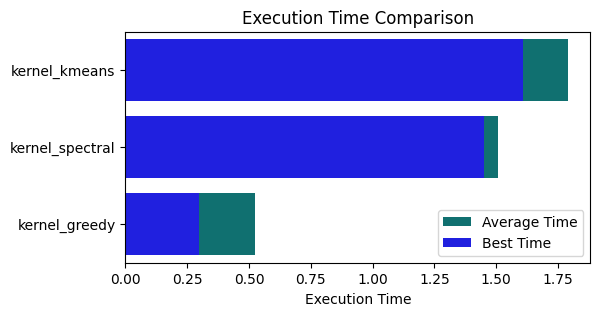

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ['kernel_kmeans', 'kernel_spectral', 'kernel_greedy']
average_times = [1.790852463245392, 1.5082889556884767, 0.5250202775001526]
best_times = [1.6095130443572998, 1.4509823322296143, 0.29808521270751953]

# Vẽ biểu đồ ngang cho thời gian trung bình và thời gian tốt nhất
plt.figure(figsize=(6, 3))
sns.barplot(x=average_times, y=methods, color='teal', label='Average Time')
sns.barplot(x=best_times, y=methods, color='blue', label='Best Time')
plt.xlabel('Execution Time')
plt.title('Execution Time Comparison')
plt.legend()
plt.show()


Kernel Greedy Kmeans có thời gian chạy nhanh hơn nhiều so với 2 phương pháp còn lại


In [ ]:
import matplotlib.pyplot as plt
def plot_2d(X, y):
    pc_res = pd.DataFrame(X, columns=["pc1", "pc2"])
    pc_res["y"] = y
    # Vẽ biểu đồ scatterplot
    sns.scatterplot(data=pc_res, x="pc1", y="pc2", hue="y", cmap='viridis')
    warnings.filterwarnings('ignore')
    # Hiển thị biểu đồ
    plt.show()


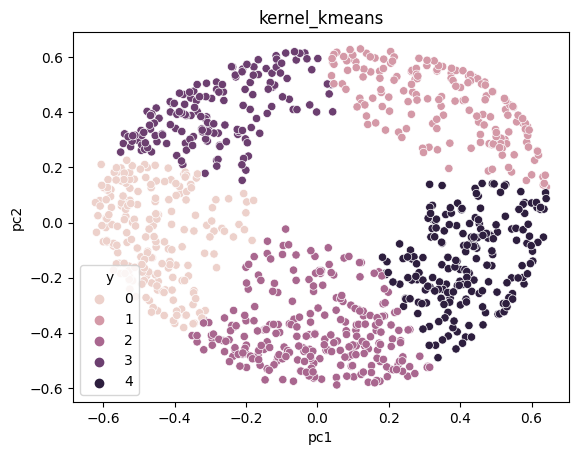

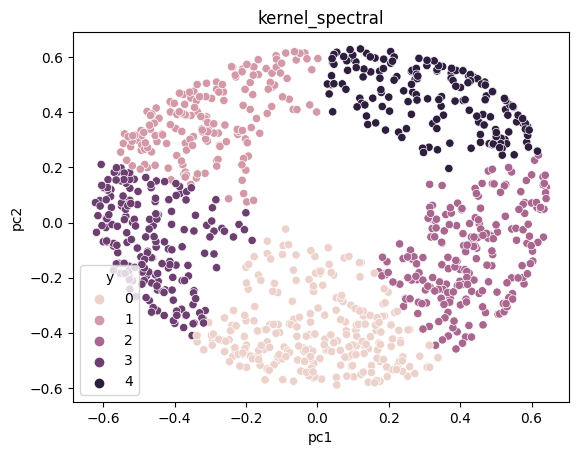

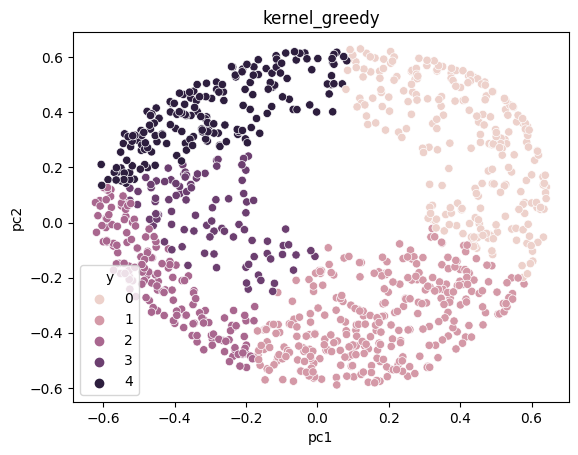

<Figure size 640x480 with 0 Axes>

In [ ]:
labels1 = best_labels[0]
labels2 = best_labels[1]
labels3= best_labels[2]
plt.title("kernel_kmeans")
plot_2d(k_pca, labels1)
plt.title("kernel_spectral")
plot_2d(k_pca, labels2)
plt.title("kernel_greedy")
plot_2d(k_pca, labels3)

plt.tight_layout()
plt.show()

# kernel Greedy Kmeans
Kết quả phân cụm không tốt. Tuy nhiên thời gian chạy ngắn\
Kernel Greedy rút ngắn thời gian nhưng sẽ không hiệu quả trong 1 số trường hợp \
# Kernel Kmeans \
Kết quả phân cụm tốt. Tuy nhiên thời gian chạy dài hơn \
# Kernel Spectral \
Kết quả phân cụm tốt. Tuy nhiên thời gian chạy ngắn hơn kernel kmeans.\
=> Phương pháp Kernel Spectral có độ phức tạp cao hơn , điều này có nghĩa thời gian chạy lâu hơn.\
Trong 1 số trường hợp. Kernel Spectral có thời gian thực hiện ngắn hơn \

# Kernel CCA

In [ ]:
# Tạo 2 dữ liệu phi tuyến X,Y
from sklearn.datasets import make_s_curve
X, _= make_swiss_roll(n_samples=1000, noise=0.5, random_state=42)
Y, _ = make_s_curve(n_samples=1000, noise=0.1, random_state=42)

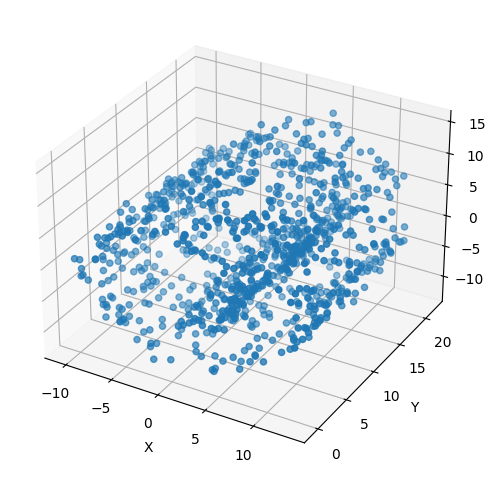

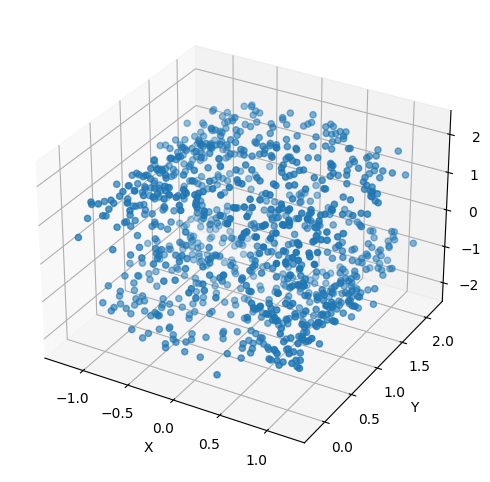

In [ ]:
plot_3d(X,None)
plot_3d(Y,None)

In [ ]:
print('X',X.shape,'\nY',Y.shape)

X (1000, 3) 
Y (1000, 3)


In [ ]:
from sklearn.cross_decomposition import CCA
from sklearn.metrics.pairwise import pairwise_kernels
def cca_transform(X, Y, k):
    # Khởi tạo mô hình CCA với k
    cca = CCA(n_components=k)
    # Huấn luyện mô hình trên dữ liệu X và Y
    cca.fit(X, Y)
    # Giảm chiều dữ liệu X và Y
    X_c, Y_c = cca.transform(X, Y)
    # Trả về các hệ số tương quan
    correlations = np.corrcoef(X_c.T, Y_c.T)[:cca.n_components, cca.n_components:]
    # Trả về dữ liệu đã giảm chiều và hệ số tương quan
    return X_c, Y_c, correlations

def Kernel_CCA(X,Y,k):
    X = pairwise_kernels(X, metric='rbf', gamma=0.00007)
    Y = pairwise_kernels(Y, metric='rbf', gamma=0.00007)
    X_c , Y_c , cor =cca_transform(X, Y, k)
    return X_c , Y_c , cor


In [ ]:
X_c , Y_c , Cor = Kernel_CCA(X,Y,2)

correlations: 
 [[ 9.97913781e-01 -3.41619959e-09]
 [ 5.78581686e-04  9.96371794e-01]]


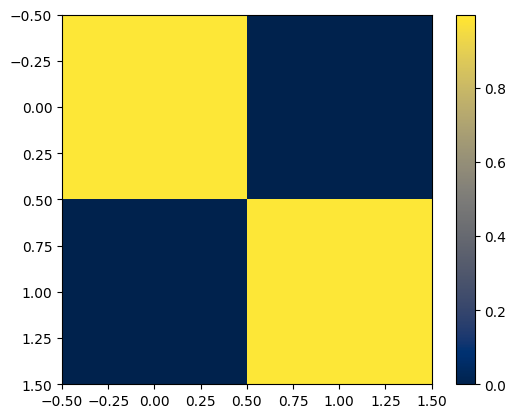

In [ ]:
print('correlations: \n',Cor )
plt.imshow(Cor , cmap='cividis', interpolation='nearest')
plt.colorbar()
plt.show()

Mối quan hệ tương quan giãuw X và Y gần bằng 1. Nhận thấy mối quan hệ cao \
Tuy nhiên, 2 hệ số còn lại gần bằng 0. Điều này cho thấy không có mối quan hệ giãuw X, Y\
=> X, Y có thể được sử dụng để giải quyết các vấn đề liên quan đến nhau.\
nhưng cũng có thể không tìm thấy mối quan hệ giữa một số cặp thành phần.

# Giảm chiều giữa Kernel PCA và Kernel CCA

In [ ]:
def plot_kpca(k_pca):
    plt.scatter(k_pca[:, 0], k_pca[:, 1], cmap='viridis')
    plt.show()
def kernel_pca(X,gamma):
    kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=gamma, n_components=2,random_state=42)
    X_kpca = kpca.fit_transform(X)
    return X_kpca
x_kpca = kernel_pca(X,0.007)
y_kpca = kernel_pca(Y,0.007)


In [ ]:
print('X      : ', X.shape,'\nX_c    : ', X_c.shape , '\nX_kpca : ', x_kpca.shape)

X      :  (1000, 3) 
X_c    :  (1000, 2) 
X_kpca :  (1000, 2)


In [ ]:
print('Y      : ', Y.shape,'\nY_c    : ', Y_c.shape , '\nY_kpca : ', y_kpca.shape)

Y      :  (1000, 3) 
Y_c    :  (1000, 2) 
Y_kpca :  (1000, 2)


Nhận thấy số chiều đã thay đổi từ 3 xuống 2\
CCA có thể giảm chiều dữ liệu trong quá trình tìm hệ số tương quan lớn nhất

Trực quan tập dữ liệu X trước và sau

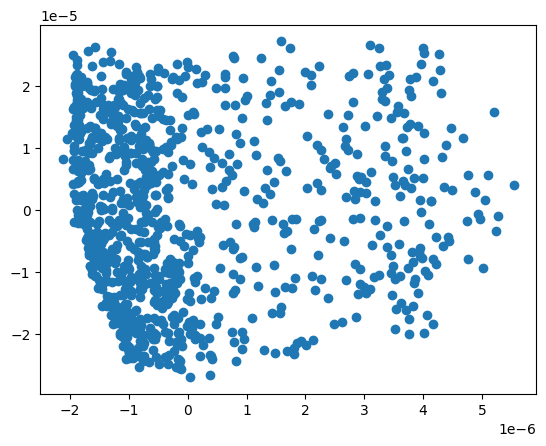

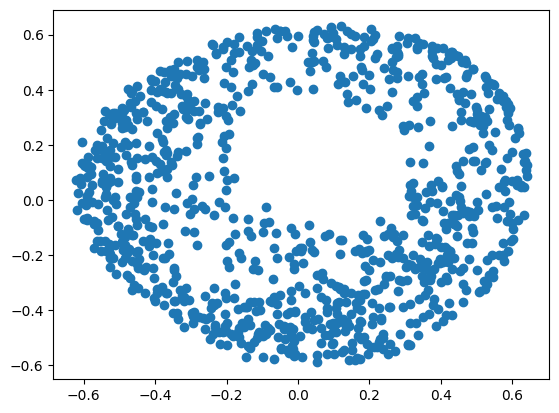

In [ ]:
# Tập X
plot_kpca(X_c)
plot_kpca(x_kpca)

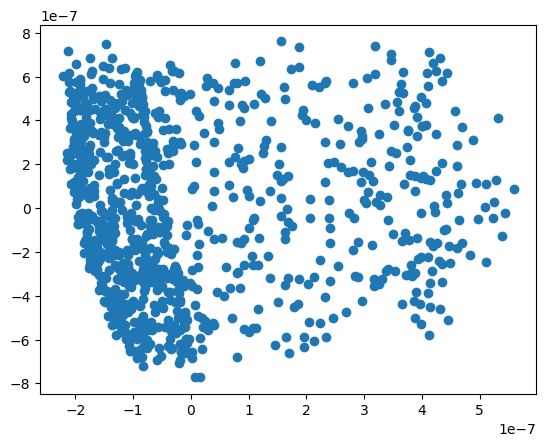

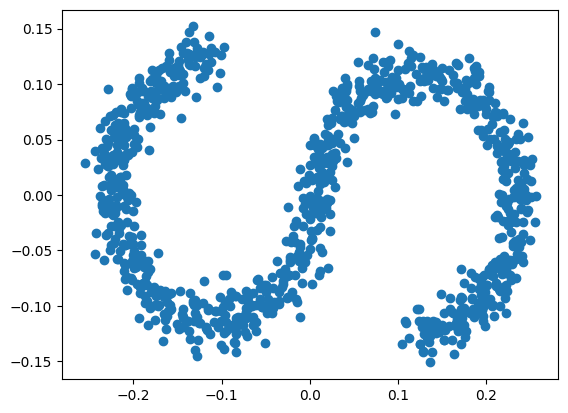

In [ ]:
#Tập Y
plot_kpca(Y_c)
plot_kpca(y_kpca)

Nhận thấy X_c, Y_c khá tương đồng nhau\
Điều này cho thấy Kernel CCA đã hoạt động tốt

PCA và CCA tuy đề có thể giảm chiều dữ liệu.\
Tuy nhiên mục đích của 2 phương pháp là khác nhau.\
Điều đó dẫn đến việc giảm chiều cho ra kết quả khác nhau

Dùng Kmeans cho dữ liệu đã kernel CCA

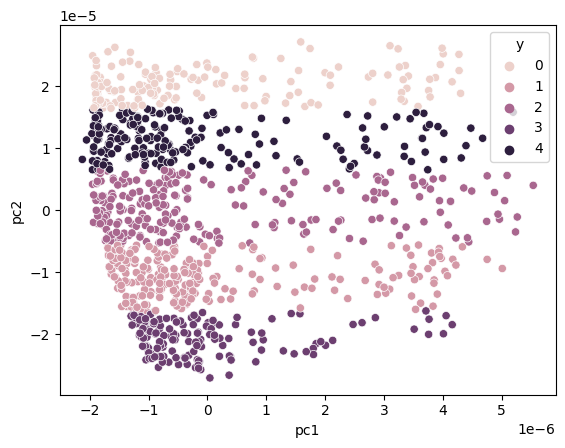

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def plot_2d(X, y):
    pc_res = pd.DataFrame(X, columns=["pc1", "pc2"])
    pc_res["y"] = y
    # Vẽ biểu đồ scatterplot
    sns.scatterplot(data=pc_res, x="pc1", y="pc2", hue="y", cmap='viridis')
    # Hiển thị biểu đồ
    plt.show()
def Kmeans(X, k):
    X=pairwise_kernels(X, metric='rbf', gamma=0.1)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels
labels = Kmeans(X_c, 5)
plot_2d(X_c,labels)

CCA có thể được dùng để tìm mối quan hệ các tập dữ liệu với nhau\
Và có thể kết hợp với các phương pháp khác để phân cụm, dự đoán ,....